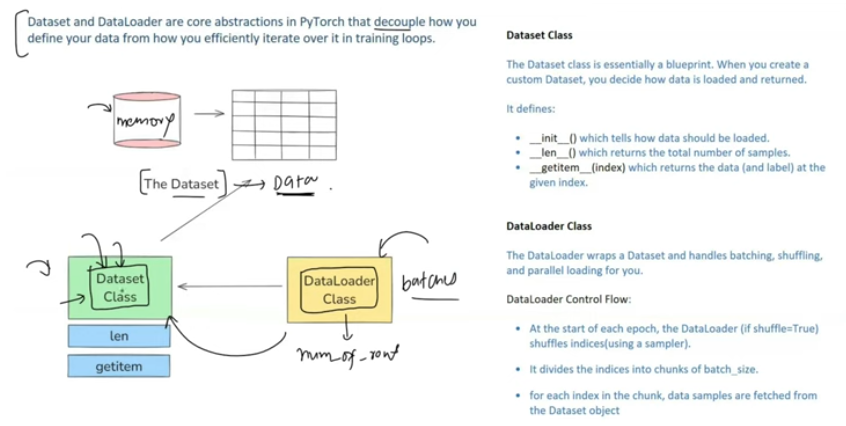

## Dataset class is used to load data (it knows where the data is) and dataLoader class is used to make batches out of the rows returned by the Dataset class


In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
X , y = make_classification (
    n_samples = 10,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    random_state = 42
)

In [3]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [4]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [5]:
if torch.cuda.is_available():
  print("yes")
  device = torch.device("cuda")

yes


In [6]:
X = torch.tensor(X,device = device,dtype = torch.float32)
y = torch.tensor(y,device = device,dtype = torch.long)

In [7]:
from torch.utils.data import Dataset , DataLoader

In [8]:
class MyDataset(Dataset):
  def __init__(self,features,labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index] , self.labels[index]


### you can implement data transformations in getitem method

In [9]:
dataset = MyDataset(X,y)

In [10]:
len(dataset)

10

In [11]:
dataset[1]

(tensor([-1.1402, -0.8388], device='cuda:0'), tensor(0, device='cuda:0'))

In [12]:
dataloader = DataLoader(dataset,batch_size = 2 , shuffle = True)

In [15]:
for features, labels in dataloader:
  print(features,labels,sep="\n")

tensor([[-1.9629, -0.9923],
        [-0.5872, -1.9717]], device='cuda:0')
tensor([0, 0], device='cuda:0')
tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388]], device='cuda:0')
tensor([1, 0], device='cuda:0')
tensor([[1.8997, 0.8344],
        [1.7774, 1.5116]], device='cuda:0')
tensor([1, 1], device='cuda:0')
tensor([[ 1.7273, -1.1858],
        [-0.7206, -0.9606]], device='cuda:0')
tensor([1, 0], device='cuda:0')
tensor([[-0.9382, -0.5430],
        [-2.8954,  1.9769]], device='cuda:0')
tensor([1, 0], device='cuda:0')


In [ ]:
'''
from torch.utils.data import DataLoader

loader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4  # ← Number of subprocesses used for data loading
)

'''

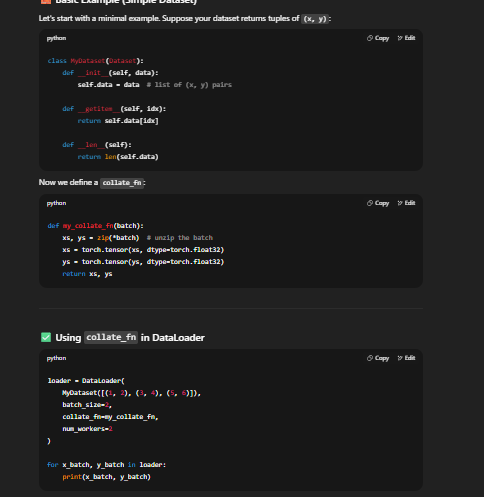